In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
titanicdata=pd.read_csv(r"C:\ProgramData\Ml_Data\Titanic_Data.csv")
titanic_test = pd.read_csv("C:\ProgramData\Ml_Data\Titanic_Test.csv")

In [45]:
type(titanicdata)

pandas.core.frame.DataFrame

In [46]:
titanicdata.shape

(891, 12)

In [47]:
titanicdata.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
titanicdata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
titanicdata.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
titanicdata.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis

# Missing Data

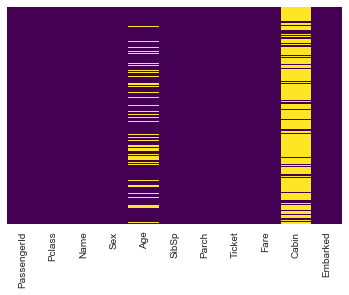

In [51]:
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #Roughly 20 percent of the Age data is missing.

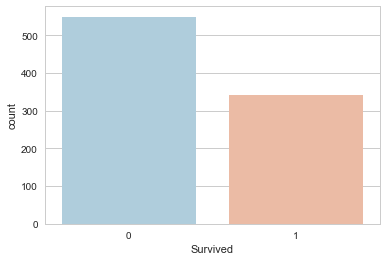

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanicdata,palette='RdBu_r')

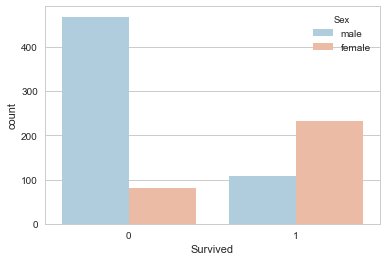

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanicdata,palette='RdBu_r')

# DATA CLEANING

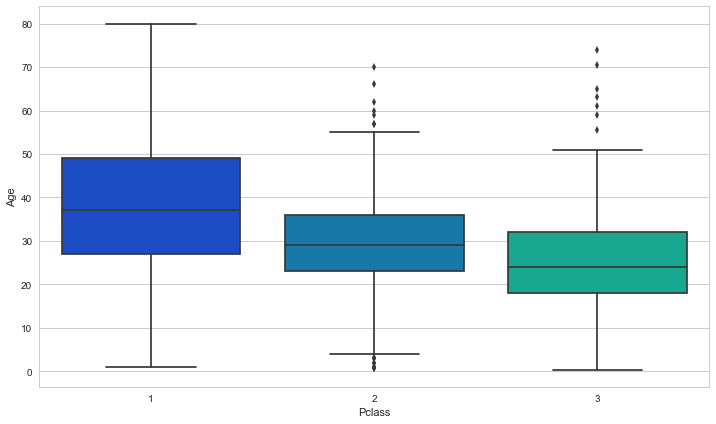

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanicdata,palette='winter')

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [57]:
titanicdata['Age'] = titanicdata[['Age','Pclass']].apply(impute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age,axis=1)

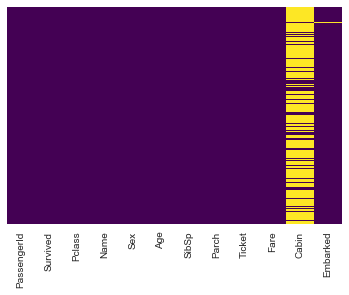

In [58]:
sns.heatmap(titanicdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [94]:
titanicdata.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Cabin',axis=1,inplace=True)
titanicdata.dropna(inplace=True)
titanicdata.head()

ValueError: labels ['Cabin'] not contained in axis

In [89]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [91]:
sex = pd.get_dummies(titanicdata[‘Sex’],drop_first=True)
embark = pd.get_dummies(titanicdata[‘Embarked’],drop_first=True)
titanicdata.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanicdata = pd.concat([titanicdata,sex,embark],axis=1)
titanicdata.head()

SyntaxError: invalid character in identifier (<ipython-input-91-be7fcc00998d>, line 1)

In [62]:
#accessing a single key
p= titanicdata["PassengerId"] #0R p=titanicdata.PassengerId

In [63]:
type(p)

pandas.core.series.Series

In [64]:
an=titanicdata[["Name","Age"]]

In [65]:
type(an)

pandas.core.frame.DataFrame

In [66]:
#Extracting row and column simultaneously
#loc - when index is in category/String. Categorical is of two types Ordinal and Nominal.
#iloc - when index is integer/Numerical

titanicdata.iloc[:,2:4]

,Pclass,Name
0,3,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,"Allen, Mr. William Henry"
5,3,"Moran, Mr. James"
6,1,"McCarthy, Mr. Timothy J"
7,3,"Palsson, Master. Gosta Leonard"
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,2,"Nasser, Mrs. Nicholas (Adele Achem)"


In [67]:
#in terms of "loc" (same result as above but in loc we need to use "loc")

titanicdata.loc[:,["Pclass","Name"]]


,Pclass,Name
0,3,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,"Allen, Mr. William Henry"
5,3,"Moran, Mr. James"
6,1,"McCarthy, Mr. Timothy J"
7,3,"Palsson, Master. Gosta Leonard"
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,2,"Nasser, Mrs. Nicholas (Adele Achem)"


In [68]:
titanicdata["Sex"]=="male" #Comparison_operator

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16      True
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869     True
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886     True
887    False
888    False
889     True
890     True
Name: Sex, dtype: bool

In [69]:
xx = titanicdata[titanicdata["Sex"]=="male"]

In [70]:
xx.shape

(577, 11)

In [71]:
xx[xx["Survived"]==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.00,0,0,244373,13.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,S
36,37,1,3,"Mamee, Mr. Hanna",male,24.00,0,0,2677,7.2292,C
55,56,1,1,"Woolner, Mr. Hugh",male,37.00,0,0,19947,35.5000,S
65,66,1,3,"Moubarek, Master. Gerios",male,24.00,1,1,2661,15.2458,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,C


In [72]:
 len(xx[xx["Survived"]==1])

109

In [73]:
# percentage of male and female 109/577*100 = 18%

In [74]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [75]:
titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
titanicdata.describe().T #T means transpose

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.066409,13.244532,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
